In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [2]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import missingno

import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats


In [3]:
import glob

#get all csv file names
filepath='Datafor555/PR'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
li = []
for filename in all_files:
    yr=filename[-6:-4]
    df_pr = pd.read_csv(filename,encoding='latin-1')
    df_pr['year']=yr
    li.append(df_pr)

#concatenate all csv files into a dataframe
df_PR = pd.concat(li, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_PR_grouped_yearly=df_PR.groupby(['year']).mean()

df_PR_grouped_yearly

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,...,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT23,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,72,3.199698,1.532276,0.004530,4.246615,80.012458,44449.951453,78.843431,22.227141,0.280464,30.986207,0.182759,1.812973e+07,6.614123e+07,26.927897,2.869385,1.418279,1.421663,10.920347,1968.915817,2.499811,1.396753,17791.905247,1997.028690,12.202515,0.438104,13.946325,0.018859,4.921180,0.016296,0.053675,2.010570,3.527746,3.102680,4.431484,0.027563,0.062863,2.804642,0.044971,11.151227,...,13.906480,99.626446,1.241049,3.022485,1.106673,3.008704,28.873743,3.009188,25.519632,4.900870,34.208741,1.646924,43.556692,734.927466,23.530464,775.318182,664.793103,702.522727,117.720368,12.134978,243.364780,1998.933688,NaN,0.137033,1.792752,0.263118,0.0,170.311896,3.982635,0.270148,1.312500,21719.175532,2016.341876,3.057143,68.517602,NaN,NaN,NaN,NaN,NaN
01,72,3.200741,1.540000,0.004815,4.229781,79.750370,44254.704358,78.673774,21.923889,0.275928,31.255172,0.000000,1.813001e+07,6.614072e+07,27.181481,2.869630,1.427212,1.433397,11.010370,1969.674444,2.515185,1.413333,17954.330000,1997.839259,12.264653,0.439581,13.997146,0.019505,4.922455,0.018126,0.078735,2.026296,3.515556,3.147037,4.434815,0.029020,0.063273,2.800666,0.044244,11.172963,...,14.012179,99.585000,1.266147,3.006803,1.244814,2.981922,29.081970,2.983349,25.804044,4.903901,34.236143,1.647229,43.530871,672.553546,23.529496,685.318182,671.000000,665.972973,114.307473,11.850547,236.355852,1999.860609,NaN,0.138519,1.795185,0.258889,0.0,167.580875,4.039259,0.270130,1.312500,21628.357755,2017.231684,4.233333,69.109467,NaN,NaN,NaN,NaN,NaN
02,72,3.211205,1.555105,0.004055,4.221906,NaN,44187.953254,78.562606,21.716779,0.277857,31.716724,0.000000,1.813036e+07,6.614209e+07,27.474751,2.870254,1.421527,1.427691,11.035017,1969.940656,2.510874,1.410247,18343.077036,1999.115044,12.257421,0.437648,14.045045,0.019915,4.924609,0.018065,0.078473,2.029856,3.510505,3.150756,4.444895,0.027027,0.058796,2.820768,0.043148,11.184519,...,13.538407,99.588535,1.267037,2.856852,1.240493,2.860597,33.137316,2.860531,26.764533,4.879564,34.241359,1.648041,42.751917,602.776197,23.535799,569.750000,454.380952,611.923077,110.844877,11.481973,245.495495,2000.831039,NaN,0.125323,1.792773,0.259123,0.0,172.729730,4.078511,0.267652,1.200000,22014.029398,2018.568990,4.687500,69.105785,NaN,NaN,NaN,NaN,NaN
03,72,3.218978,1.551095,0.004029,4.217961,NaN,44185.598394,78.307151,21.700903,0.275152,31.869640,0.092624,1.815164e+07,6.604257e+07,27.754309,2.870073,1.431244,1.436857,11.013143,1970.283680,2.528660,1.431022,18579.282585,1999.672873,12.275878,0.439401,14.065014,

In [4]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_PR['year']=df_PR['year'].map(d)
df_PR

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,72,11,1,3.0,1.0,1,0.0,1.0,127.0,76770.0,SAN ANTONIO CHANNEL,*,PR 1,INTERCHANGE 5 IN SAN JUAN,99.99,NaN,NaN,NaN,NaN,18274200.0,66051200.0,0.0,3.0,1.0,1.0,2.0,1925.0,4.0,0.0,63990.0,1987.0,4,15.8,0.0,0.0,0.0,1,0,0,0,...,NaN,NaN,NaN,0.0,1,1,0,0,4.0,1.0,NaN,Y,6,81915.0,2005.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,29.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72,31,1,3.0,1.0,8839,0.0,1.0,127.0,34070.0,PIEDRAS RIVER,NaN,LOCAL ROAD,EXPERIMENTAL STATION R.P.,99.99,NaN,NaN,NaN,NaN,18234200.0,66033600.0,0.0,3.0,1.0,1.0,17.0,1853.0,1.0,0.0,2500.0,1987.0,0,7.9,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,9,6,0,0,2.0,0.0,NaN,Y,6,7980.0,2005.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,36.6,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72,41,1,3.0,1.0,873,0.0,1.0,127.0,76770.0,FRAILES CREEK,NaN,PR 873,2.4 KM EAST OF GUAYNABO,99.99,NaN,NaN,NaN,NaN,18210600.0,66054200.0,0.0,3.0,1.0,1.0,19.0,1854.0,2.0,0.0,2368.0,1987.0,0,7.0,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,1930.0,1,1,0,0,2.0,0.0,NaN,Y,6,2719.0,2005.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,28.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72,51,1,3.0,1.0,798,0.0,1.0,127.0,75651.0,ARENAS CREEK,NaN,PR 798,7 KM N E OF AGUAS BUENAS,99.99,NaN,NaN,NaN,NaN,18182400.0,66041800.0,2.0,3.0,1.0,1.0,19.0,1929.0,2.0,0.0,1230.0,1987.0,0,3.4,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,1,1,0,0,4.0,0.0,NaN,Y,6,1200.0,2007.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,48.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72,61,1,3.0,1.0,798,0.0,6.0,25.0,70577.0,CA&AS RIVER,NaN,PR 798,7.5 KM N W OF CAGUAS,99.99,NaN,NaN,NaN,NaN,18174200.0,66033600.0,2.0,3.0,1.0,1.0,19.0,1856.0,2.0,0.0,1230.0,1987.0,2,6.7,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,9,6,0,0,4.0,0.0,NaN,Y,8,2300.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,47.5,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,72,DAPASOBUC000157,1,8.0,0.0,0,0.0,0.0,61.0,29125.0,EL TORO CREEK,NaN,CHRISMAN RD.,NEAR BLDG 1322,99.99,0.0,0.0,NaN,NaN,18244388.0,66070600.0,1.0,3.0,74.0,74.0,9.0,1947.0,2.0,0.0,1920.0,2011.0,0,8.3,0.0,0.0,0.0,0,0,0,0,...,NaN,0.0,0.0,0.0,1,6,8,8,40.0,0.0,1.0,Y,8,2000.0,2029.0,NaN,Y,,,,,,,,,,,,0,,77.6,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,72,DAPASOBUC000542,1,8.0,0.0,0,0.0,0.0,61.0,29125.0,EL TORO CREEK,NaN,COLUMBUS ST.,NEAR BLDG 539,99.99,0.0,0.0,NaN,NaN,18245982.0,66073843.0,2.0,3.0,74.0,74.0,9.0,1983.0,2.0,0.0,3000.0,2011.0,0,6.9,0.0,0.

In [5]:
weatherdata = pd.read_csv("Datafor555/avg_temp.PR.csv", index_col=False)
PRweather = weatherdata.loc[:,['year','avg_temp','avg_prcp','max_temp','min_temp']]
PRweather

,year,avg_temp,avg_prcp,max_temp,min_temp
0,1992,70.3,56.18,80.6,59.9
1,1993,70.3,49.91,81.0,59.6
2,1994,71.6,64.78,81.5,61.5
3,1995,70.8,59.10,81.2,60.4
4,1996,69.9,53.96,80.7,59.0
5,1997,71.1,59.65,81.6,60.7
6,1998,72.5,57.05,82.8,62.2
7,1999,71.2,49.69,82.1,60.1
8,2000,70.6,40.29,82.1,59.1
9,2001,70.9,52.21,81.7,60.1


In [6]:
df1_PR=df_PR.merge(PRweather, left_index=False)
df1_PR

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avg_temp,avg_prcp,max_temp,min_temp
0,72,11,1,3.0,1.0,1,0.0,1.0,127.0,76770.0,SAN ANTONIO CHANNEL,*,PR 1,INTERCHANGE 5 IN SAN JUAN,99.99,NaN,NaN,NaN,NaN,18274200.0,66051200.0,0.0,3.0,1.0,1.0,2.0,1925.0,4.0,0.0,63990.0,1987.0,4,15.8,0.0,0.0,0.0,1,0,0,0,...,1,1,0,0,4.0,1.0,NaN,Y,6,81915.0,2005.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,29.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
1,72,31,1,3.0,1.0,8839,0.0,1.0,127.0,34070.0,PIEDRAS RIVER,NaN,LOCAL ROAD,EXPERIMENTAL STATION R.P.,99.99,NaN,NaN,NaN,NaN,18234200.0,66033600.0,0.0,3.0,1.0,1.0,17.0,1853.0,1.0,0.0,2500.0,1987.0,0,7.9,0.0,0.0,0.0,0,0,0,0,...,9,6,0,0,2.0,0.0,NaN,Y,6,7980.0,2005.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,36.6,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
2,72,41,1,3.0,1.0,873,0.0,1.0,127.0,76770.0,FRAILES CREEK,NaN,PR 873,2.4 KM EAST OF GUAYNABO,99.99,NaN,NaN,NaN,NaN,18210600.0,66054200.0,0.0,3.0,1.0,1.0,19.0,1854.0,2.0,0.0,2368.0,1987.0,0,7.0,0.0,0.0,0.0,0,0,0,0,...,1,1,0,0,2.0,0.0,NaN,Y,6,2719.0,2005.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,28.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
3,72,51,1,3.0,1.0,798,0.0,1.0,127.0,75651.0,ARENAS CREEK,NaN,PR 798,7 KM N E OF AGUAS BUENAS,99.99,NaN,NaN,NaN,NaN,18182400.0,66041800.0,2.0,3.0,1.0,1.0,19.0,1929.0,2.0,0.0,1230.0,1987.0,0,3.4,0.0,0.0,0.0,0,0,0,0,...,1,1,0,0,4.0,0.0,NaN,Y,6,1200.0,2007.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,48.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
4,72,61,1,3.0,1.0,798,0.0,6.0,25.0,70577.0,CA&AS RIVER,NaN,PR 798,7.5 KM N W OF CAGUAS,99.99,NaN,NaN,NaN,NaN,18174200.0,66033600.0,2.0,3.0,1.0,1.0,19.0,1856.0,2.0,0.0,1230.0,1987.0,2,6.7,0.0,0.0,0.0,0,0,0,0,...,9,6,0,0,4.0,0.0,NaN,Y,8,2300.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,47.5,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71341,72,DAPASOBUC000157,1,8.0,0.0,0,0.0,0.0,61.0,29125.0,EL TORO CREEK,NaN,CHRISMAN RD.,NEAR BLDG 1322,99.99,0.0,0.0,NaN,NaN,18244388.0,66070600.0,1.0,3.0,74.0,74.0,9.0,1947.0,2.0,0.0,1920.0,2011.0,0,8.3,0.0,0.0,0.0,0,0,0,0,...,1,6,8,8,40.0,0.0,1.0,Y,8,2000.0,2029.0,NaN,Y,,,,,,,,,,,,0,,77.6,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,56.87,81.8,61.6
71342,72,DAPASOBUC000542,1,8.0,0.0,0,0.0,0.0,61.0,29125.0,EL TORO CREEK,NaN,COLUMBUS ST.,NEAR BLDG 539,99.99,0.0,0.0,NaN,NaN,18245982.0,66073843.0,2.0,3.0,74.0,74.0,9.0,1983.0,2.0,0.0,3000.0,2011.0,0,6.9,0.0,0.0,0.0,1,0,1,1,

In [7]:
df1_PR['Age_of_Bridge'] = df1_PR['year']-df1_PR['YEAR_BUILT_027']
df2_PR=df1_PR.loc[:,['avg_temp','avg_prcp','min_temp','max_temp','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df2_PR.dropna(inplace=True)
df3_PR=df2_PR[(df2_PR['SUBSTRUCTURE_COND_060']!='N') & (df2_PR['SUPERSTRUCTURE_COND_059']!='N') & (df2_PR['DECK_COND_058']!='N')]
for col in df3_PR:
  df3_PR[col]=df3_PR[col].astype(float)
df3_PR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,avg_temp,avg_prcp,min_temp,max_temp,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,70.3,56.18,59.9,80.6,67.0,4.0,63990.0,10.4,10.0,16.0,15.8,4.0,3.0,3.0
1,70.3,56.18,59.9,80.6,139.0,1.0,2500.0,9.1,3.0,4.9,7.9,5.0,5.0,5.0
2,70.3,56.18,59.9,80.6,138.0,2.0,2368.0,9.8,8.0,7.0,7.0,4.0,4.0,4.0
3,70.3,56.18,59.9,80.6,63.0,2.0,1230.0,9.1,1.0,10.1,3.4,5.0,5.0,5.0
7,70.3,56.18,59.9,80.6,43.0,2.0,12800.0,21.9,4.0,8.7,7.3,5.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71337,71.7,56.87,61.6,81.8,43.0,1.0,75.0,22.9,1.0,3.9,3.7,7.0,7.0,6.0
71338,71.7,56.87,61.6,81.8,3.0,2.0,50.0,18.0,1.0,5.5,4.3,8.0,8.0,8.0
71341,71.7,56.87,61.6,81.8,66.0,2.0,1920.0,6.1,1.0,8.7,8.3,5.0,5.0,7.0
71343,71.7,56.87,61.6,81.8,70.0,2.0,4000.0,6.7,1.0,7.9,6.9,7.0,7.0,7.0


In [8]:
# Separate the Feature data X from the response data y1,y2,y3
X=df3_PR.iloc[:,:-3] # All columns except for the last 3 columns
y1=df3_PR.iloc[:,-3] #The last column would be our response variable in our case, Deck Condition
y2=df3_PR.iloc[:,-2]  #The last column would be our response variable in our case, SuperStructure Condition
y3=df3_PR.iloc[:,-1]  #The last column would be our response variable in our case, Substructure Condition

For the Deck

In [9]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [10]:
model.best_estimator_

KNeighborsClassifier()

In [11]:
pred=model.predict(X_test)
pred

array([6., 8., 5., ..., 6., 5., 6.])

In [12]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

0.7117792109256449

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,pred)
print('Accuracy:',result2)

Confusion Matrix:
[[  18    0    0    0    1   17   16    3    0    0]
 [   2    1    0    0    1    0    1    1    0    0]
 [   1    0    9    0    0    3    5    0    0    0]
 [   4    1    0   38   14   23   25    2    0    0]
 [   2    1    0   10  306  181   93    5    0    0]
 [   4    0    3   25  113 2387  737   66    7    0]
 [   5    0    0   25   94  684 3349  211   14    0]
 [   3    0    0    9   12  119  272 1177   53    1]
 [   1    0    0    3    2   15   31  115  217    0]
 [   0    0    0    0    0    0    1    0    2    3]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.33      0.38        55
         1.0       0.33      0.17      0.22         6
         2.0       0.75      0.50      0.60        18
         3.0       0.35      0.36      0.35       107
         4.0       0.56      0.51      0.54       598
         5.0       0.70      0.71      0.71      3342
         6.0       0.74      0.76      0.75      

For the Superstructure

In [14]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [16]:
model.best_estimator_

KNeighborsClassifier()

In [17]:
pred=model.predict(X1_test)
pred

array([6., 7., 5., ..., 6., 7., 6.])

In [18]:
from sklearn import metrics

metrics.accuracy_score(y1_test, pred)

0.7256259484066768

In [19]:
# Print the accuracy score
print(f'The accuracy score value for the Superstructure is {metrics.accuracy_score(y1_test, pred)*100 :.2f}%')

The accuracy score value for the Superstructure is 72.56%


For the Sub Structure

In [20]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [22]:
model.best_estimator_

KNeighborsClassifier()

In [23]:
pred=model.predict(X2_test)
pred

array([5., 8., 6., ..., 6., 6., 5.])

In [24]:
from sklearn import metrics

metrics.accuracy_score(y2_test, pred)

0.7403262518968133

In [25]:
# Print the accuracy score
print(f'the accuracy score value for the Sub-Structure is {metrics.accuracy_score(y2_test, pred)*100 :.2f}%')

the accuracy score value for the Sub-Structure is 74.03%


Do a Correlation Analysis

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,pred)
print('Accuracy:',result2)

Confusion Matrix:
[[  10    0    0    1    2   21   11   10    0    0]
 [   3    1    0    0    0    0    1    1    0    0]
 [   1    0    8    0    1    2    6    0    0    0]
 [   1    0    1    7    8   12   60   15    3    0]
 [   1    0    4   19   63  198  256   57    0    0]
 [   1    2    3   25   98  845 1920  426   22    0]
 [  10    0    7   23   82  590 2583 1027   60    0]
 [   1    0    0    6   13   59  298  999  269    1]
 [   0    0    0    2    1    3   26  111  239    2]
 [   0    0    0    0    0    0    1    0    3    2]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      0.18      0.24        55
         1.0       0.33      0.17      0.22         6
         2.0       0.35      0.44      0.39        18
         3.0       0.08      0.07      0.07       107
         4.0       0.24      0.11      0.15       598
         5.0       0.49      0.25      0.33      3342
         6.0       0.50      0.59      0.54      

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [28]:
cnf_matrix = confusion_matrix(y_test, pred)

In [29]:
print(cnf_matrix)

[[  10    0    0    1    2   21   11   10    0    0]
 [   3    1    0    0    0    0    1    1    0    0]
 [   1    0    8    0    1    2    6    0    0    0]
 [   1    0    1    7    8   12   60   15    3    0]
 [   1    0    4   19   63  198  256   57    0    0]
 [   1    2    3   25   98  845 1920  426   22    0]
 [  10    0    7   23   82  590 2583 1027   60    0]
 [   1    0    0    6   13   59  298  999  269    1]
 [   0    0    0    2    1    3   26  111  239    2]
 [   0    0    0    0    0    0    1    0    3    2]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


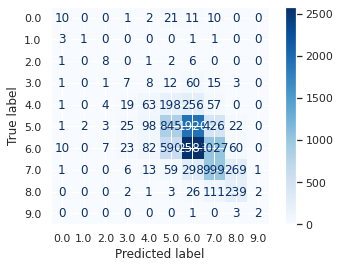

In [34]:
disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)
matplotlib.pyplot.

In [ ]:
df3_PR.corr()

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df3_PR.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
np.triu(np.ones_like(df6.corr()))

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df6.corr(), dtype=np.bool))
heatmap = sns.heatmap(df6.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);